### x) In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.head()

<ipython-input-1-743dafc3b4fa>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

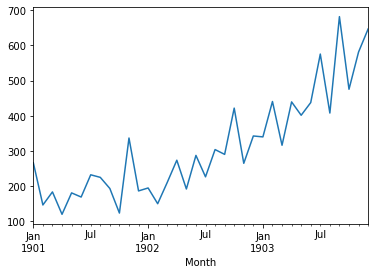

In [2]:
series.plot()

In [3]:
s = series.values

tot_size = len(s)

train_size = int(len(s)*0.66)

train = s[:train_size]
test = s[train_size:]

print(len(train) , len(test) , tot_size)

23 13 36


predicted=343.271619, expected=342.300000
predicted=293.328866, expected=339.700000
predicted=368.668354, expected=440.400000
predicted=335.044278, expected=315.900000
predicted=363.220731, expected=439.300000
predicted=357.643760, expected=401.300000
predicted=443.046612, expected=437.400000
predicted=378.365487, expected=575.500000
predicted=459.413195, expected=407.600000
predicted=526.889344, expected=682.000000
predicted=457.231070, expected=475.300000
predicted=672.913742, expected=581.300000
predicted=531.540969, expected=646.900000
Test MSE: 7924.783


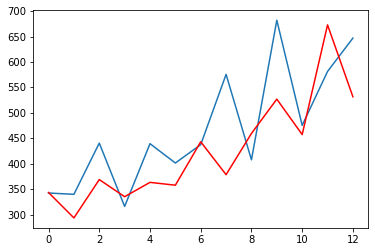

In [4]:
history = [x for x in train]

predict = []

for t in range(len(test)):
    model = ARIMA(history , order=(5,1,0))
    model = model.fit()
    output = model.forecast()
    
    predict.append(output)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output, obs))

mse = mean_squared_error(test , predict)
print('Test MSE: %.3f' % mse)

pyplot.plot(test)
pyplot.plot(predict, color='red')